### Least Squares Example: Moving Average Model

Suppose we've been given a set of data representing a timeseries of inputs and outputs. We can load the data (which is in a .csv) and plot it to see how it behaves over time.

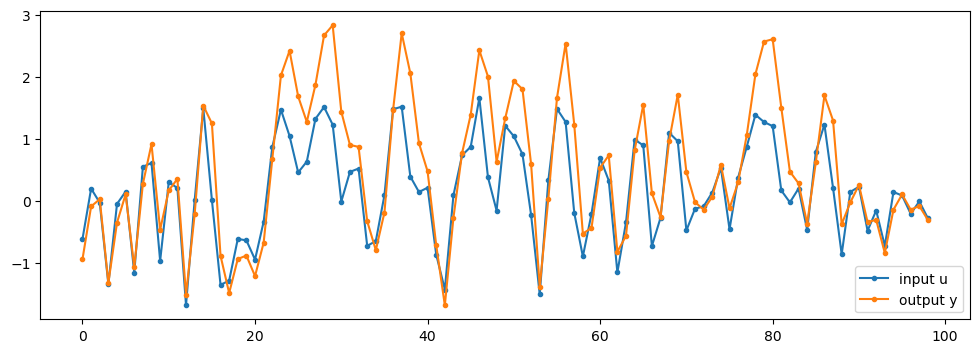

In [3]:
# Load the data file
using CSV, DataFrames

df = CSV.read("moving_avg_data.csv", DataFrame, delim = ',');

# u is the first column of the data
u = df[:,1]

# y is the second column of the data
y = df[:,2]

# T represents length of the time (number of obeservations)
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y], ".-");
legend(["input u", "output y"], loc="lower right");

In [7]:
zeros(T,k)

99×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮         
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [5]:
A

99×3 Matrix{Float64}:
 -0.6159   0.0      0.0
  0.1959  -0.6159   0.0
 -0.0316   0.1959  -0.6159
 -1.3455  -0.0316   0.1959
 -0.0513  -1.3455  -0.0316
  0.1471  -0.0513  -1.3455
 -1.1615   0.1471  -0.0513
  0.5478  -1.1615   0.1471
  0.6096   0.5478  -1.1615
 -0.9706   0.6096   0.5478
  0.3018  -0.9706   0.6096
  0.2039   0.3018  -0.9706
 -1.6833   0.2039   0.3018
  ⋮                
  0.205    1.2281   0.7855
 -0.8645   0.205    1.2281
  0.1419  -0.8645   0.205
  0.2251   0.1419  -0.8645
 -0.4831   0.2251   0.1419
 -0.1577  -0.4831   0.2251
 -0.7281  -0.1577  -0.4831
  0.1397  -0.7281  -0.1577
  0.0851   0.1397  -0.7281
 -0.2105   0.0851   0.1397
 -0.011   -0.2105   0.0851
 -0.2845  -0.011   -0.2105

In [6]:
u

99-element Vector{Float64}:
 -0.6159
  0.1959
 -0.0316
 -1.3455
 -0.0513
  0.1471
 -1.1615
  0.5478
  0.6096
 -0.9706
  0.3018
  0.2039
 -1.6833
  ⋮
  0.205
 -0.8645
  0.1419
  0.2251
 -0.4831
 -0.1577
 -0.7281
  0.1397
  0.0851
 -0.2105
 -0.011
 -0.2845

Now we want to set up our least squares problem. Our "b" vector will be the outputs (y). The "A" matrix will be the previous k inputs, necessarily modified at the start of the time horizon. Our variable vector "w" will be the weights oneach of the previous k inputs (so we will have k variables).


2-norm error: 

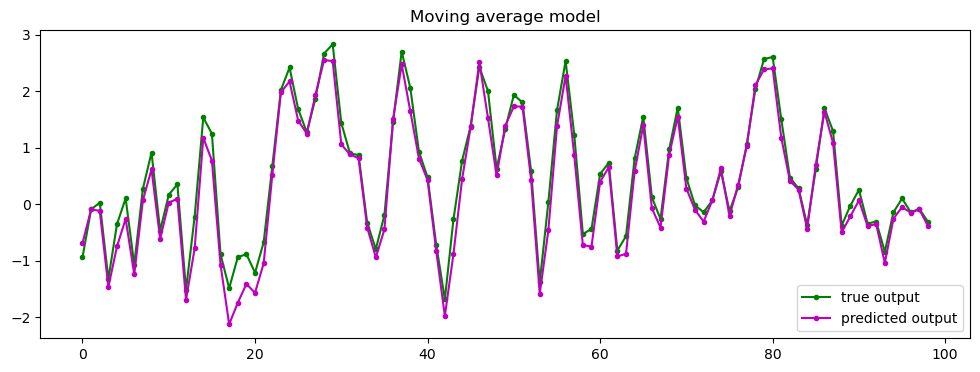

2.476743915945296


In [4]:
# generate A matrix. Using morewidth creates better fit
k = 3

# initialize A as a matrix of zeros with T rows and k columns
A = zeros(T,k)

# in each row, the entries are most recent input, second-most recent input, ....
# we need to do some fancy things with the first few rows
# e.g., i=1: A[1:end,1] is the whole first column of A. Contains [u[1],u[2],...u[T]].
# e.g.2, i=2: A[2:end,2] is a zero in A[1,2] followed by the rest of the
# second column of A. Contains [0,u[2],u[1]m...u[T]-1], etc.

for i = 1:k
    A[i:end,i] = u[1:end-i+1]
end

# we can find the optimal weights with the backslash operator
wopt = A\y

# find what the outputs "should" be based on those weights
yest = A*wopt

# plot the calculated outputs vs. the observd outputs
figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");
println()

using LinearAlgebra
# also calculate the 2-norm error
println("2-norm error: ", norm(yest-y))

In [10]:
println("Optimal Weights: ", wopt)
println()
println("Y estimates: ", yest)

Optimal Weights: [1.120219592292637, 0.50616282569454, 0.29815510364431647]

Y estimates: [-0.6899432468930351, -0.0922946662151396, -0.11987536989742148, -1.4648416219177691, -0.7479310483317761, -0.26234954288531076, -1.2419738616051843, 0.06960678635977734, 0.6138547064941868, -0.6153989119594854, 0.028555985516372673, 0.09178337206590731, -1.6924758292672244, -0.784844807182475, 1.1729283836387414, 0.7698059828327802, -1.0686377009070132, -2.1259823226912404, -1.746268733460389, -1.4115897773141417, -1.5699361231205997, -1.0476102710949409, 0.5136987932064043, 1.9809400975173712, 2.1700673800643964, 1.4772412772336319, 1.248991581084669, 1.9337102809618154, 2.5485168959939997, 2.531799351407947, 1.0568827986303617, 0.8795115208222701, 0.8128320530779389, -0.41360556297284357, -0.9425614577317212, -0.4454076203698853, 1.503523946386944, 2.471891061683417, 1.6438456210205743, 0.8067857058287242, 0.42359104842515455, -0.8231499643128577, -1.9795856423798786, -0.881740531725556, 0.4406